In [3]:
import pandas as pd

### Python Fundamentals ###

# read .cvs files
article_df = pd.read_csv('articleInfo.csv')
author_df = pd.read_csv('authorInfo.csv')

In [4]:
full_df = pd.merge(article_df, author_df, how='left', on='Article No.')
full_df = full_df.fillna(0, downcast='infer')

In [5]:
# Plot the yearly_publication figure, in which the x-axis is the year, the y-axis is the number of articles published during that year.
# https://stackoverflow.com/questions/22219004/how-to-group-dataframe-rows-into-list-in-pandas-groupby/66018377#66018377

# could use nunique instead of author name list thing
full_df1 = full_df.groupby(['Article No.', 'Year'])['Author Name'].apply(list).reset_index(name='Author Names') 
yearly_publication_counts = full_df1['Year'].value_counts().sort_index('index')
yearly_publication_df = pd.DataFrame(yearly_publication_counts)
yearly_publication_df = yearly_publication_df.reset_index()
yearly_publication_df.columns = ['Year', 'Number of articles']
yearly_publication_df

/var/folders/5k/sjwwd0rj5cx9swsd9y1mfdzm0000gn/T/ipykernel_24878/3351451387.py:6: FutureWarning: In a future version of pandas all arguments of Series.sort_index will be keyword-only.
  yearly_publication_counts = full_df1['Year'].value_counts().sort_index('index')


,Year,Number of articles
0,2017,7
1,2018,10
2,2019,12
3,2020,36
4,2021,53
5,2022,46


<AxesSubplot: xlabel='Year'>

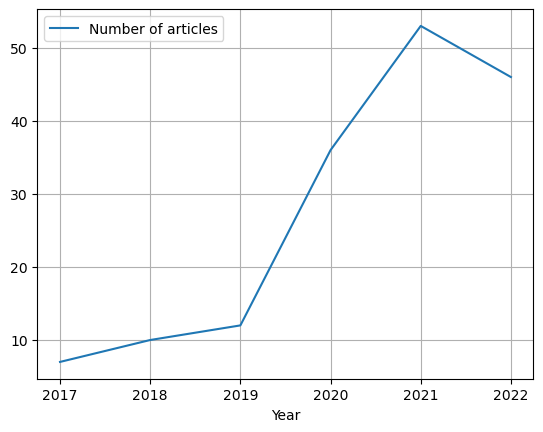

In [13]:
# Syntax for visualization plot
yearly_publication_df.plot(x='Year', y='Number of articles', kind='line', grid=True)	

In [7]:
# Plot the yearly_citation figure, in which the x-axis is the year, the y-axis is the total number of citations during that year.

yearly_citation_counts = full_df.groupby(['Year']).sum()['Citation'].sort_index('index')
yearly_citation_df = pd.DataFrame(yearly_citation_counts)
yearly_citation_df = yearly_citation_df.reset_index()
yearly_citation_df.columns = ['Year', 'Number of citations']
yearly_citation_df

/var/folders/5k/sjwwd0rj5cx9swsd9y1mfdzm0000gn/T/ipykernel_24878/1624899623.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_citation_counts = full_df.groupby(['Year']).sum()['Citation'].sort_index('index')
/var/folders/5k/sjwwd0rj5cx9swsd9y1mfdzm0000gn/T/ipykernel_24878/1624899623.py:3: FutureWarning: In a future version of pandas all arguments of Series.sort_index will be keyword-only.
  yearly_citation_counts = full_df.groupby(['Year']).sum()['Citation'].sort_index('index')


,Year,Number of citations
0,2017,3788
1,2018,1974
2,2019,1933
3,2020,2305
4,2021,1735
5,2022,469


<AxesSubplot: xlabel='Year'>

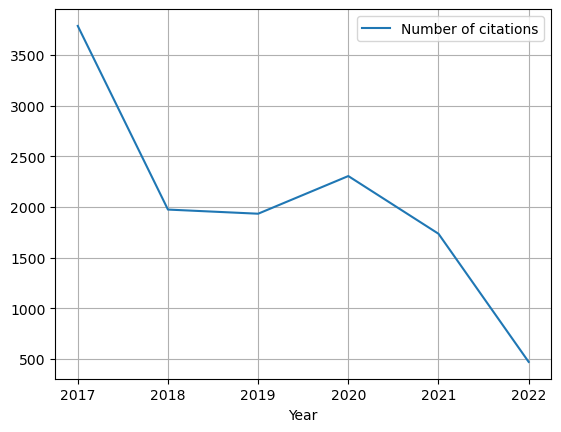

In [14]:
yearly_citation_df.plot(x='Year', y='Number of citations', kind='line', grid='True')	

In [9]:
# Plot the figure of the number of publications across countries. You may use any available python libraries, such as pygal_maps_world, geopandas, or others.

publication_country_counts = full_df.groupby(['Country']).count()
publication_country_df = pd.DataFrame(publication_country_counts).iloc[:, 0:1]
publication_country_df = publication_country_df.reset_index()
publication_country_df.columns = ['Country', 'Number of countries']
publication_country_df.at[0,'Country'] = 'No country'
publication_country_df

,Country,Number of countries
0,No country,85
1,Australia,13
2,Bristol,1
3,Canada,12
4,Chian,1
5,Chile,3
6,Chile,6
7,China,34
8,Cyprus,7
9,Czech Republic,15


<AxesSubplot: ylabel='Country'>

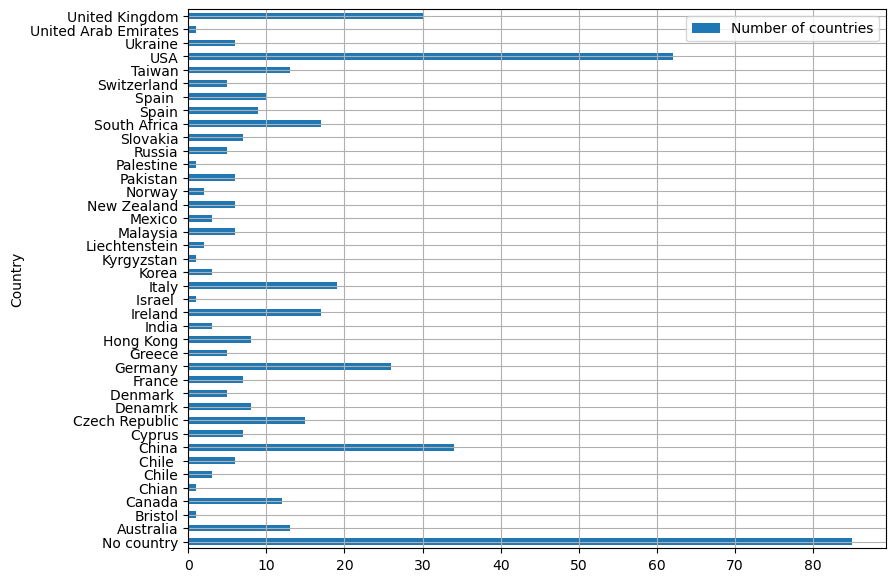

In [15]:
publication_country_df.plot.barh(x='Country', y='Number of countries', figsize=(9,7), grid=True)	

In [11]:
# What are the top 5 institutions that have the most published articles in this area?

top_institution_by_topic_counts = full_df.groupby(['Author Affiliation']).count()
top_instutution_by_topic_df = pd.DataFrame(top_institution_by_topic_counts).iloc[1:, 0:1]
top_instutution_by_topic_df = top_instutution_by_topic_df.reset_index()
top_instutution_by_topic_df.columns = ['Institution', 'Number of articles published']
top_instutution_by_topic_df.sort_values(by='Number of articles published', ascending=False,inplace=True)
top_instutution_by_topic_df = top_instutution_by_topic_df.reset_index(drop=True)
top_instutution_by_topic_df.head()



,Institution,Number of articles published
0,University of the Western Cape,17
1,Masaryk University,12
2,University College Cork,11
3,Intel Corporation,11
4,The Chinese University of Hong Kong,8


In [12]:
# Who are the top 5 researchers that have the most h-index in this area?

top_hindex_df = author_df.iloc[:, [0,-1]].fillna(0, downcast='infer').sort_values('h-index', ascending=False).reset_index(drop=True)
top_hindex_df.head()

,Author Name,h-index
0,Ulrich Trautwein,95
1,Nicolas Molinari,63
2,George S. Athwal,59
3,Maria Luisa Lorusso,33
4,Vicente A. González,33
